# Preliminary Data exploration

load dataset. this one includes all the metadata and all NA's

In [149]:
import pandas as pd
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv", encoding='latin-1', index_col=False)

## Een paar frequenties

### Aantal observaties per seizoen

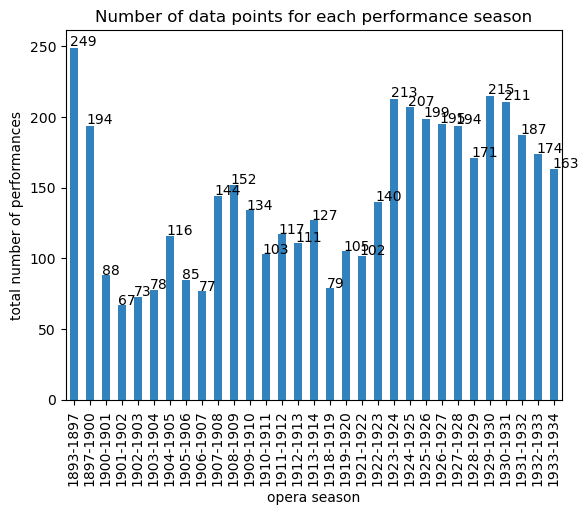

In [151]:
# Count the number of data points for each index
counts = df['Collectie'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of performances')
plt.title('Number of data points for each performance season')

# Plot the counts as a bar chart

for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# Show the plot
plt.show()

### TOP 10 producties

<AxesSubplot:>

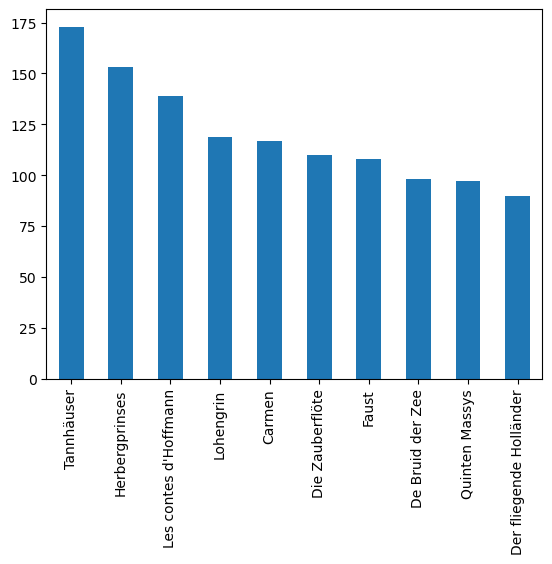

In [152]:
df['Oorspronkelijke titel'].value_counts().head(10).plot(kind='bar')
#top 10 meest gespeelde producties


### TOP 10 componisten

<AxesSubplot:>

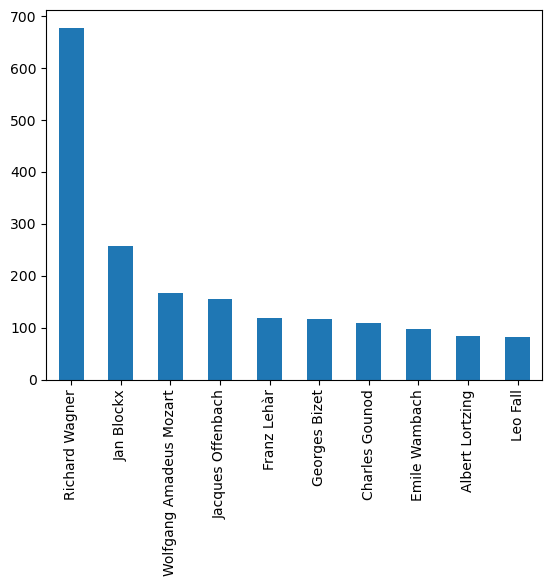

In [153]:
df['Componist'].value_counts().head(10).plot.bar()
#Meer dan 17% van alle voorstellingen waren werken van Wagner

### Evolutie van oorspronkelijke taal van producties.

#### Absolute frequentie

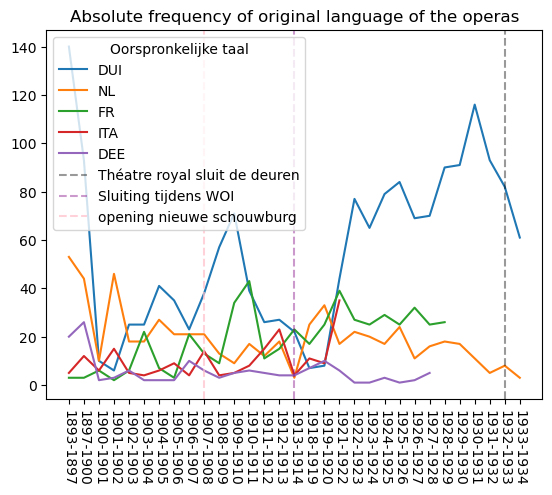

In [154]:
DUI = df[df['Oorspronkelijke taal']=='DUI']
NL = df[df['Oorspronkelijke taal']=='NL']
FR = df[df['Oorspronkelijke taal']=='FR']
ITA = df[df['Oorspronkelijke taal']=='ITA']
DEE = df[df['Oorspronkelijke taal']=='DEE']

Iksas = list(df['Collectie'].unique())
#import matplotlib.pyplot as plt

#plot each series
plt.plot(Iksas, list(DUI.groupby('Collectie')['Oorspronkelijke taal'].value_counts()), label = 'DUI')
plt.plot(list(NL.groupby('Collectie')['Oorspronkelijke taal'].value_counts()),label = 'NL')
plt.plot(list(FR.groupby('Collectie')['Oorspronkelijke taal'].value_counts()),label = 'FR')
plt.plot(list(ITA.groupby('Collectie')['Oorspronkelijke taal'].value_counts()), label = 'ITA')
plt.plot(list(DEE.groupby('Collectie')['Oorspronkelijke taal'].value_counts()),label = 'DEE')
plt.plot()

plt.title('Absolute frequency of original language of the operas')
plt.xticks(rotation=-90)
#display plot
plt.axvline(x='1932-1933', color = 'black', alpha = 0.4, linestyle = '--', label = 'Théatre royal sluit de deuren')
plt.axvline(x='1913-1914', color = 'purple', alpha = 0.4, linestyle = '--', label = 'Sluiting tijdens WOI')
plt.axvline(x='1907-1908', color = 'pink', alpha = 0.7, linestyle = '--', label = 'opening nieuwe schouwburg')

legend = plt.legend(title='Oorspronkelijke taal')

plt.show()




#### Relatieve frequentie

In [155]:
def obtain_rel_freq(taal): #de taal neemt dus de vorm aan van één van die dfs eh dus DUI of NL of ITA ofzo
    rel_freq = []
    total = list(df['Collectie'].value_counts().sort_index(axis=0))
    tal = list(taal.groupby('Collectie')['Oorspronkelijke taal'].value_counts())
    tal = zip(total, tal)
    for item in tal:
        rel_freq.append(item[1]/item[0])
    return rel_freq

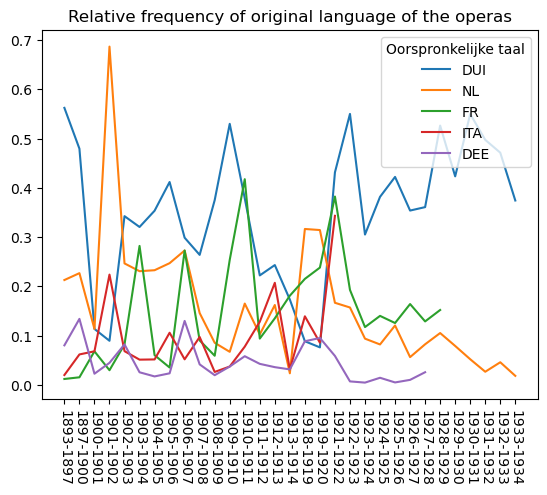

In [156]:
rel_ned = obtain_rel_freq(NL)
rel_dui = obtain_rel_freq(DUI)
rel_fr = obtain_rel_freq(FR)
rel_ita = obtain_rel_freq(ITA)
rel_dee = obtain_rel_freq(DEE)

Iksas = list(df['Collectie'].unique())
#import matplotlib.pyplot as plt

#plot each series
plt.plot(Iksas, rel_dui, label = 'DUI')
plt.plot(rel_ned,label = 'NL')
plt.plot(rel_fr,label = 'FR')
plt.plot(rel_ita, label = 'ITA')
plt.plot(rel_dee,label = 'DEE')
plt.plot()

plt.legend(loc = 'upper right', title='Oorspronkelijke taal')
plt.title('Relative frequency of original language of the operas')
plt.xticks(rotation=-90)
#display plot
plt.show()

## Gala / Volksvertoningen

In [157]:
#Gefilterede df's waarin enkel de volksvertoningen en galavoorstellingen in beschouwing worden genomen
volk = df[df['Gelegenheid'].astype(str).str.contains("Volk")]
galas = df[df['Gelegenheid'].str.contains('Gala') | (df['Gelegenheid'] == 'Gala')]

### Absolute frequenties

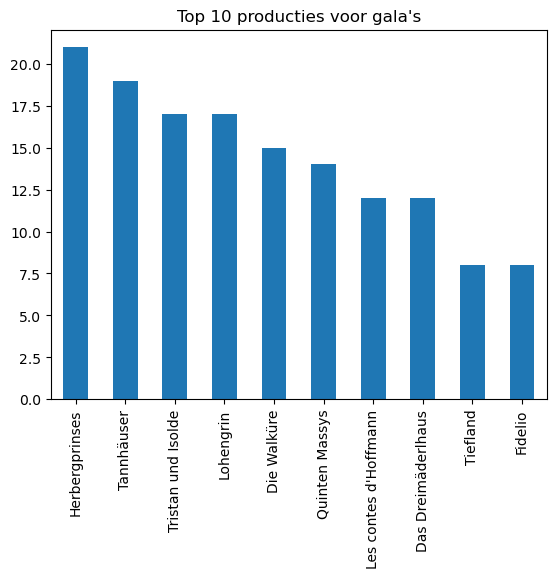

In [158]:
galas['Oorspronkelijke titel'].value_counts().head(10).plot(kind='bar', title="Top 10 producties voor gala's");  

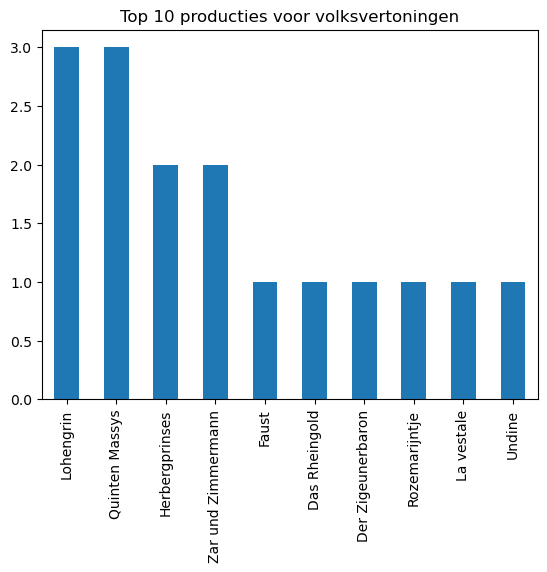

In [159]:
volk['Oorspronkelijke titel'].value_counts().head(10).plot(kind='bar', title= "Top 10 producties voor volksvertoningen");

<AxesSubplot:title={'center':"Meest voorkomende talen van gala's"}>

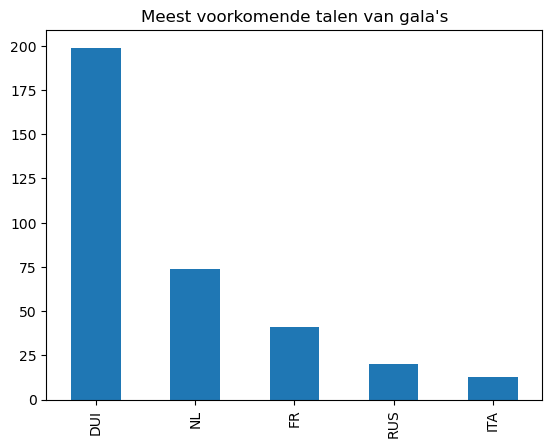

In [160]:
galas['Oorspronkelijke taal'].value_counts().head().plot(kind='bar', title = "Meest voorkomende talen van gala's")

<AxesSubplot:title={'center':'Meest voorkomende talen van volksvertoningen'}>

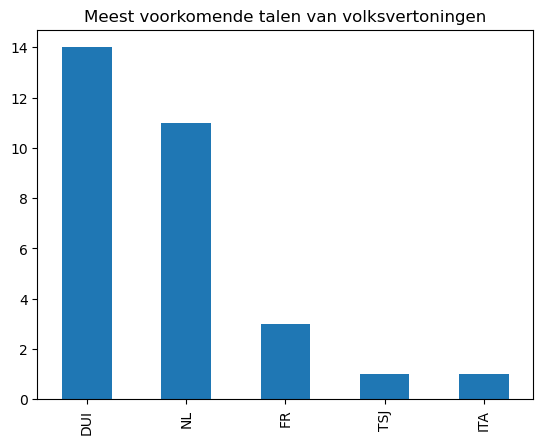

In [161]:
volk['Oorspronkelijke taal'].value_counts().plot(kind='bar', title = "Meest voorkomende talen van volksvertoningen")

## Relatieve frequenties

def plot_rel_freq(df):
    x = []
    y =  []
    for k, v in df['Oorspronkelijke taal'].value_counts().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y);

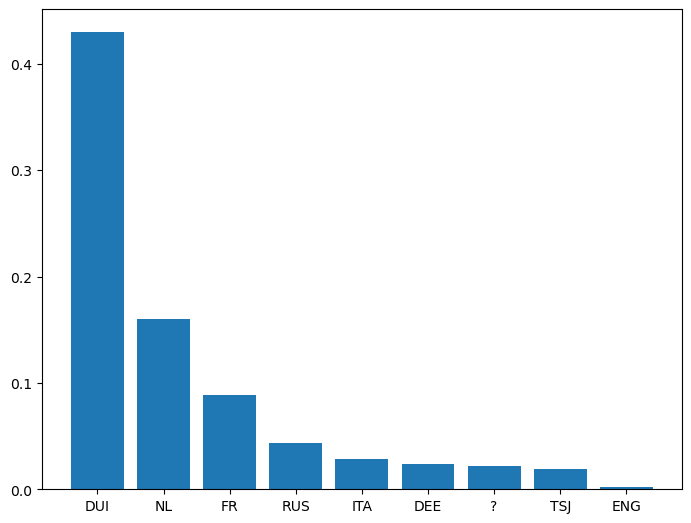

In [162]:
def plot_rel_freq(df):
    x = []
    y =  []
    for k, v in df['Oorspronkelijke taal'].value_counts().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y);

plot_rel_freq(galas)




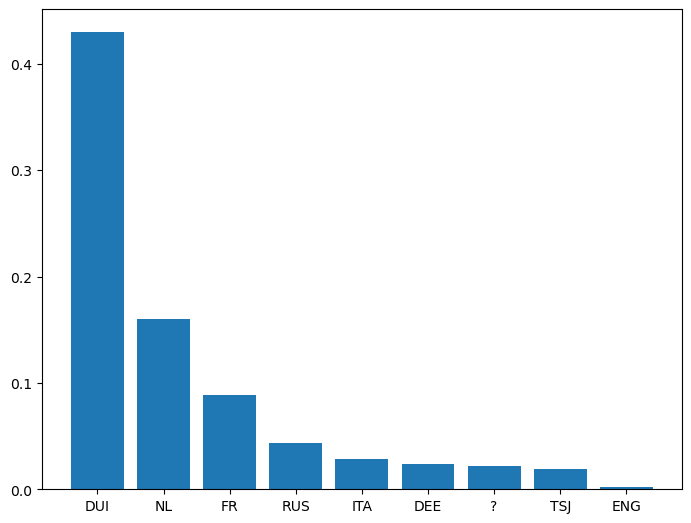

In [163]:
plot_rel_freq(galas)

### Gemiddelde tijd tussen wereldpremière van een stuk en eerste opvoering in Antwerpen.

In [172]:
eerste_voorkomen = []
for item in df.groupby('Oorspronkelijke titel')['Datum'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Oorspronkelijke titel')['Oorspronkelijke première'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


True


C:\Users\monaa\AppData\Local\Temp\ipykernel_20784\2507531932.py:12: UserWarning: Parsing '13/02/1923' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), errors='coerce');
C:\Users\monaa\AppData\Local\Temp\ipykernel_20784\2507531932.py:12: UserWarning: Parsing '31/01/1914' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), errors='coerce');
C:\Users\monaa\AppData\Local\Temp\ipykernel_20784\2507531932.py:12: UserWarning: Parsing '20/01/1908' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), errors='coerce');
C:\Users\monaa\AppData\Local\Temp\ipykernel_20784\2507531932.py:12: UserWarning: Parsing '23/11/1908' in DD/MM/YYYY format. Provide format or specif

In [166]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [170]:
# Het duurt gemiddeld 43 jaar
def Average(lst):
    return sum(lst) / len(lst)

round(Average(result), 2)

42.96